In [99]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [100]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [101]:
data.shape

(150, 6)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Text(0.5, 1.0, 'Sepal Length and Width (cm)')

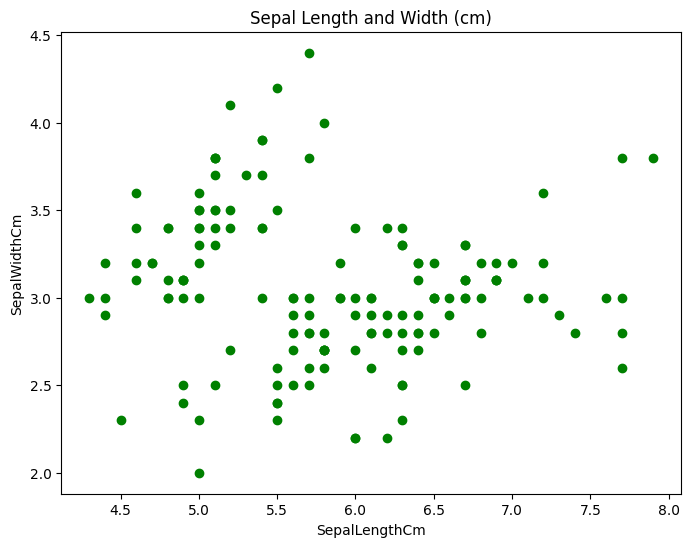

In [103]:
plt.figure(figsize = (8, 6))

plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], color = 'green')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Sepal Length and Width (cm)')

Text(0.5, 1.0, 'Petal Length and Width (cm)')

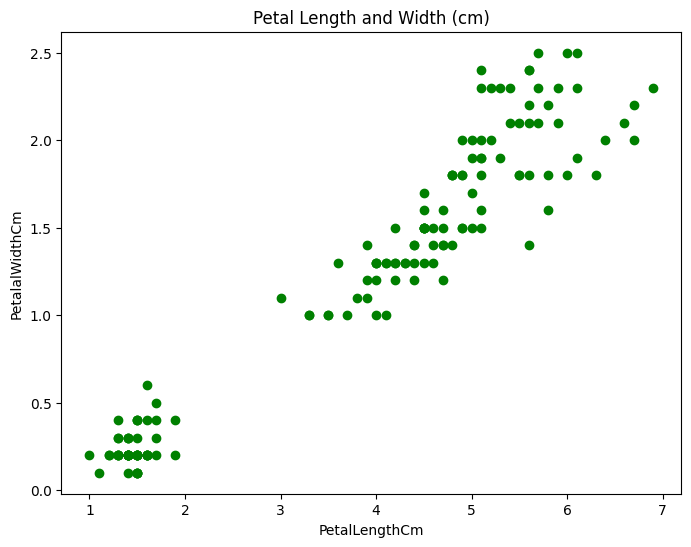

In [104]:
plt.figure(figsize = (8, 6))

plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], color = 'green')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalalWidthCm')
plt.title('Petal Length and Width (cm)')

In [105]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [106]:
data = data.drop(columns= ['Id', 'SepalLengthCm', 'SepalWidthCm', 'Species'])
data

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [107]:
# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

### Round 1

In [108]:
K = 3 # there are 3 groups
data = np.array(data)
data

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [109]:
C_x = np.random.randint(np.min(data[:, 0]), np.max(data[:, 0]), size = K)
C_x

array([2, 5, 1])

In [110]:
C_y = np.random.randint(np.min(data[:, 1]), np.max(data[:, 1]), size = K)
C_y

array([1, 0, 0])

In [111]:
# Centriods

C = np.zeros((3, 2))
C

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [112]:
C_old = np.zeros(C.shape)
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [113]:
C[:, 0] = C_x 
C[:, 1] = C_y 
C

array([[2., 1.],
       [5., 0.],
       [1., 0.]])

### 2. Assign each data point to a specific cluster 

In [114]:
cluster_label = np.zeros((len(data), 1))
cluster_label

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [115]:
for i in range(len(data)): # run 150 rounds
    distance = distance_fn(data[i, :], C)
    cluster = np.argmin(distance) # for the shortest distance
    cluster_label[i] = cluster

In [116]:
(cluster_label == 0).sum()

13

### 3. Recalculate the new Contriods

In [117]:
C_old = C.copy()
C_old

array([[2., 1.],
       [5., 0.],
       [1., 0.]])

In [118]:
for i in range(K):
    pints = [] # empty list
    points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
    C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

### Check if centriods have changed, repeat step 2 and 3

In [119]:
# calculate error

error = distance_fn(C, C_old, None)
error

1.8671219396764098

# create code to do looping to work as above steps

In [121]:
def plotCluster(data, C, cluster_label):

    colors = ['green', 'blue', 'orange', 'red', 'yellow', 'pink', 'purple', 'salmon']

    plt.figure(figsize = (8, 6))

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i])
        
    plt.scatter(C[:, 0], C[:, 1], marker = '*', color = 'black', s = 200)

    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalalWidthCm')
    plt.title('Cluster')

0.9945643805210571
0.4820464307284036
0.31517155485556914
0.20828406951905482
0.043136079753024706
0.06484577314211357
0.021978739993484986
0.0


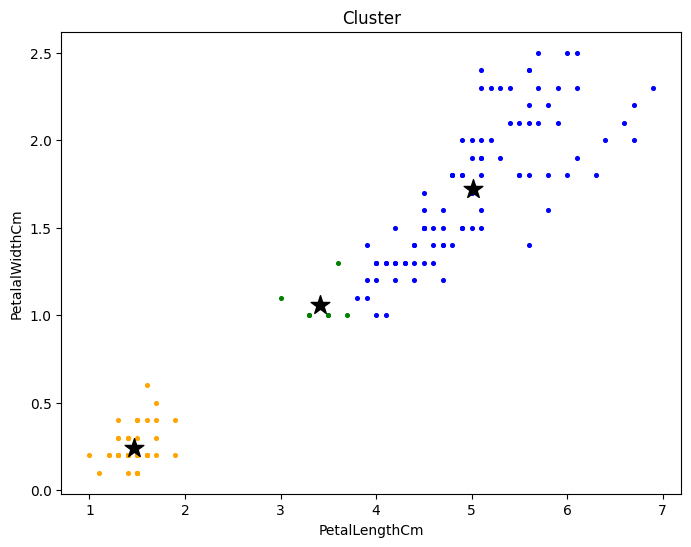

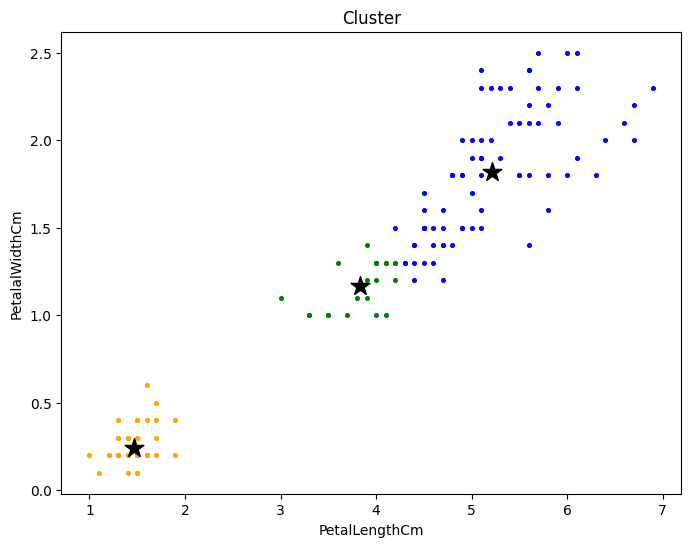

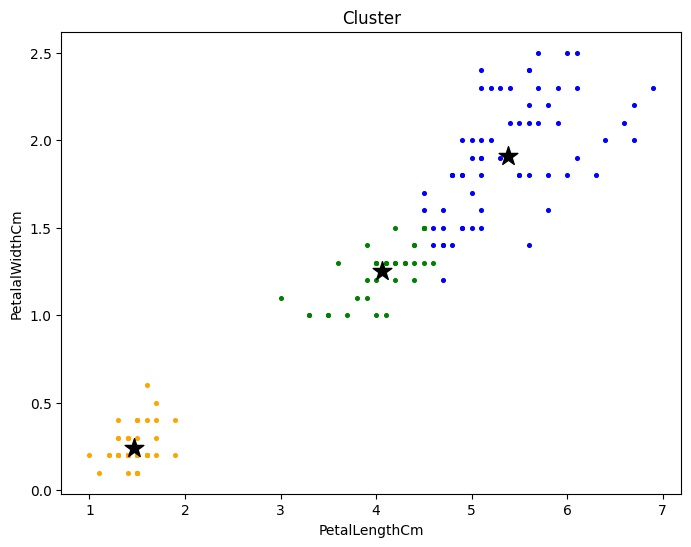

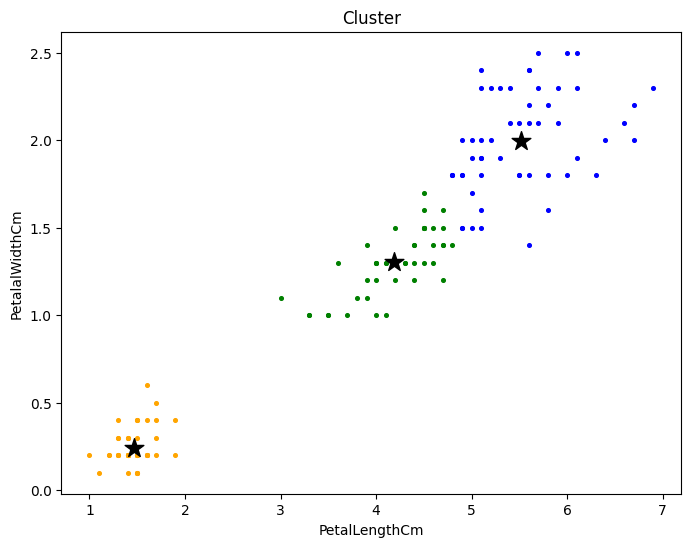

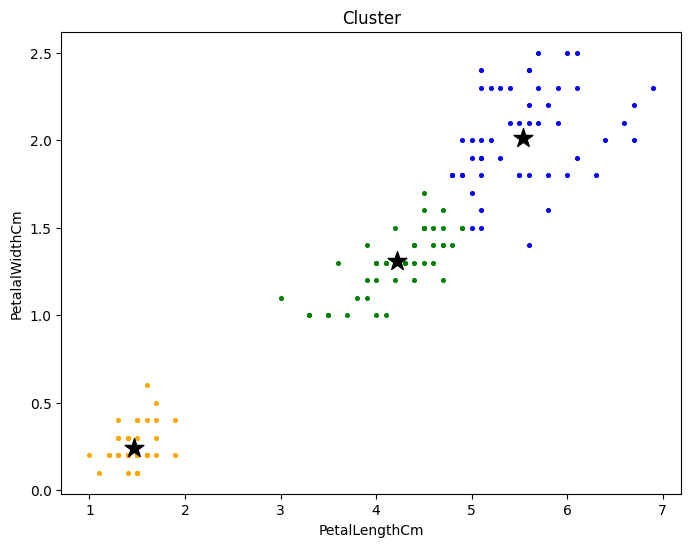

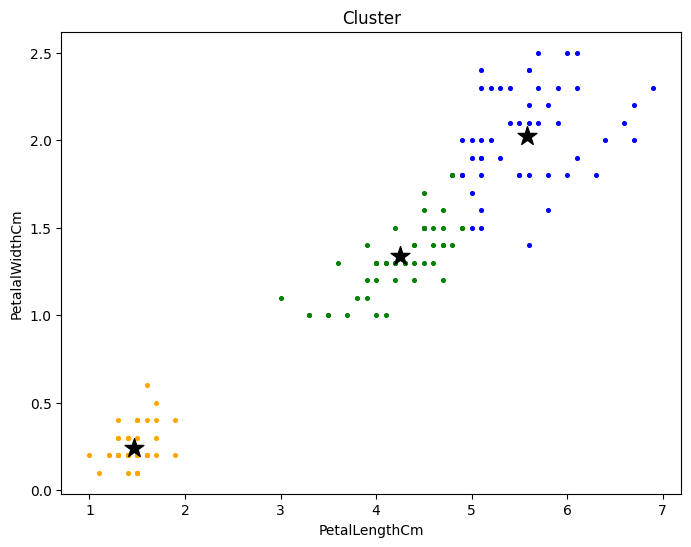

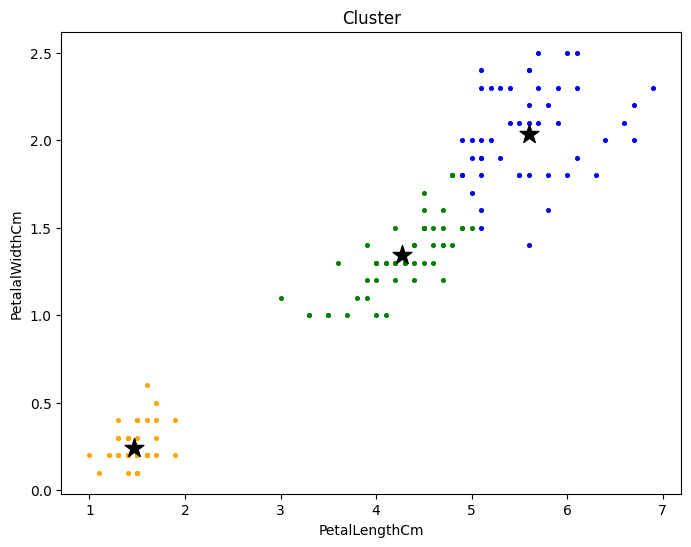

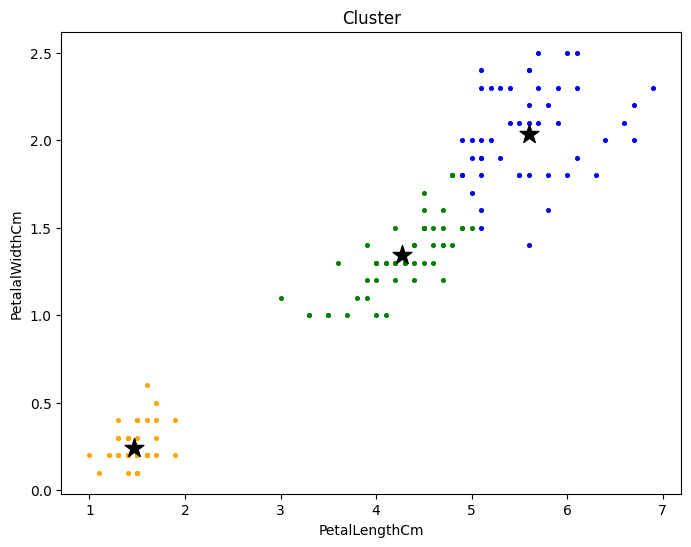

In [122]:
while error != 0: # will stop when error = 0
    
    cluster_label = np.zeros((len(data), 1))
    
    for i in range(len(data)):
        distance = distance_fn(data[i, :], C)
        cluster = np.argmin(distance)
        cluster_label[i] = cluster
    
    C_old = C.copy()
    
    for i in range(K):
        points = []
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        C[i] = np.mean(points, axis=0)
        
    plotCluster(data, C, cluster_label.copy())
    
    error = distance_fn(C, C_old, None)
    print(error)
